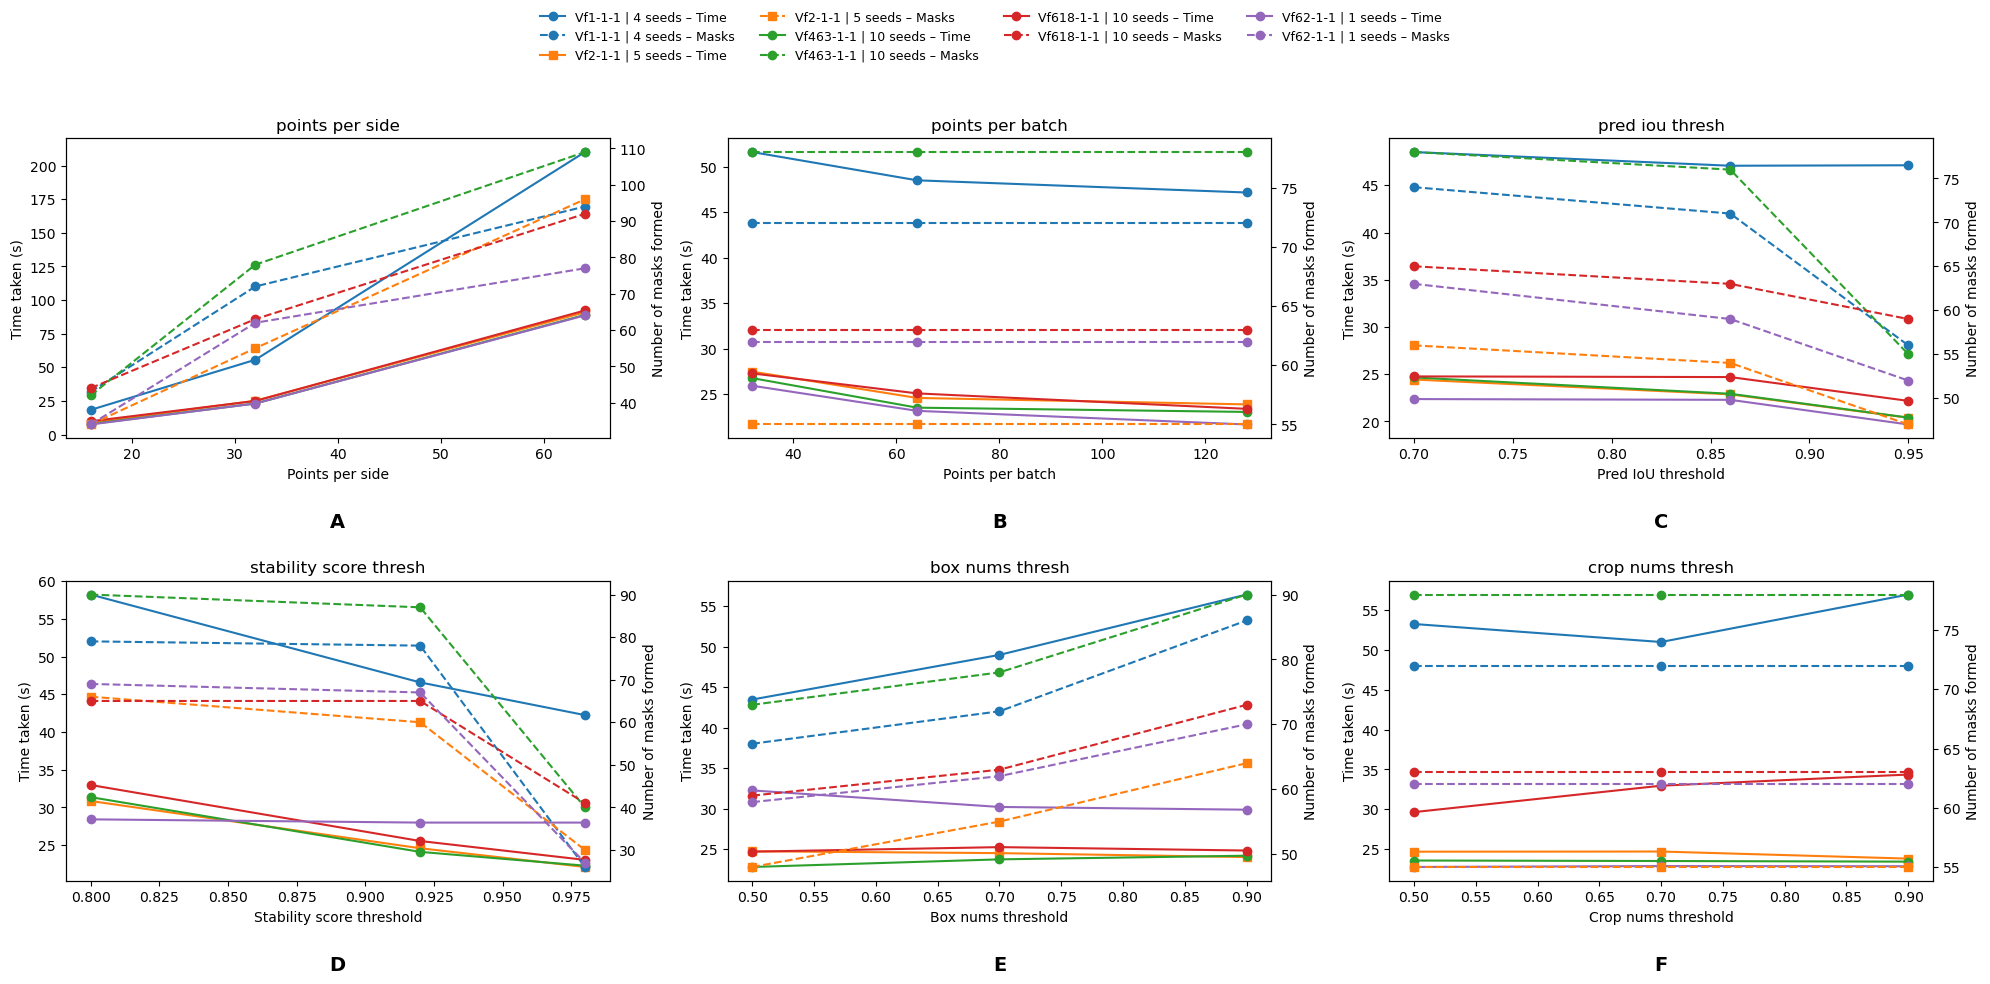

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data_path = (Path.cwd().parent / "Finetune_SAM2.1" / "Data_finetune_5.xlsx").resolve()
df = pd.read_excel(data_path)

# Marker styles for seed counts
seed_markers = {
    4: "o",
    5: "s",
    6: "^",
    7: "D"
}

# Create 2 × 3 figure
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

plots = [
    ("points per side", "Points per side"),
    ("points per batch", "Points per batch"),
    ("pred iou thresh", "Pred IoU threshold"),
    ("stability score thresh", "Stability score threshold"),
    ("box nums thresh", "Box nums threshold"),
    ("crop nums thresh", "Crop nums threshold"),
]

panel_labels = ["A", "B", "C", "D", "E", "F"]

# Lists to store legend handles and labels
legend_handles = []
legend_labels = []

for ax, (param, xlabel), panel in zip(axes, plots, panel_labels):
    param_df = df[df["Parameter"] == param]

    # Secondary y-axis
    ax2 = ax.twinx()

    for img in param_df["Image"].unique():
        img_df = param_df[param_df["Image"] == img]

        for seeds in img_df["Number of seeds in image"].unique():
            seed_df = img_df[img_df["Number of seeds in image"] == seeds]

            # Primary axis → Time taken
            time_line, = ax.plot(
                seed_df["Parameter value"],
                seed_df["Time taken"],
                marker=seed_markers.get(seeds, "o"),
                linestyle="-",
                label=f"{img} | {seeds} seeds – Time"
            )

            # Secondary axis → Number of masks
            mask_line, = ax2.plot(
                seed_df["Parameter value"],
                seed_df["Number of masks formed"],
                marker=seed_markers.get(seeds, "o"),
                linestyle="--",
                label=f"{img} | {seeds} seeds – Masks"
            )

            # Collect legend entries only once
            if time_line.get_label() not in legend_labels:
                legend_handles.extend([time_line, mask_line])
                legend_labels.extend([time_line.get_label(), mask_line.get_label()])

    ax.set_xlabel(xlabel)
    ax.set_ylabel("Time taken (s)")
    ax2.set_ylabel("Number of masks formed")
    ax.set_title(param)

    # Panel label (A–F) centered below each subplot
    ax.text(
        0.5, -0.28, panel,
        transform=ax.transAxes,
        ha="center",
        va="center",
        fontsize=14,
        fontweight="bold"
    )

# Global legend at the top
fig.legend(
    legend_handles,
    legend_labels,
    loc="upper center",
    ncol=4,
    fontsize=9,
    frameon=False
)

# Adjust layout to make space for legend and panel labels
plt.tight_layout(rect=[0, 0, 1, 0.9])

# Save figure
plt.savefig(
    "Finetune_SAM.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
